<a href="https://colab.research.google.com/github/SofiaShvedova/Programming-for-analysts/blob/main/lab%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
seed(1)
data = 5 * randn(100) + 50
print('mean=%.3f stdv=%.3f' %(mean(data), std(data)))

mean=50.303 stdv=4.426


### **Визуальные проверки нормальности**

**График гистограммы**

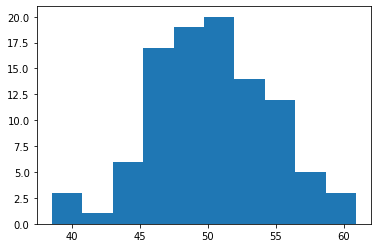

In [36]:
from matplotlib import pyplot

pyplot.hist(data)
pyplot.show()

*При выполнении примера создается график гистограммы, показывающий количество наблюдений в каждом бине. Мы можем видеть гауссовидную форму данных, которая, хотя и не сильно знакома в форме колокола, является грубым приближением.*

**Квантиль-Квантиль Участок**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


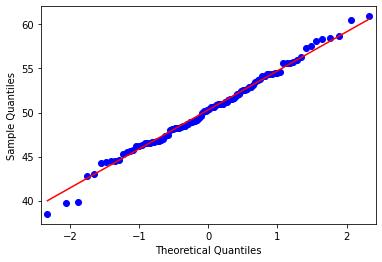

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data, line='s')
pyplot.show()

*При выполнении примера создается график QQ, показывающий график рассеяния точек в диагональной линии, который точно соответствует ожидаемому диагональному шаблону для выборки из распределения Гаусса. Есть несколько небольших отклонений, особенно в нижней части графика, что и следовало ожидать, учитывая небольшую выборку данных.*

### **Статистические тесты нормальности**

**Тест Шапиро-Вилка**

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample doesnt look Gaussian (regect H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


*При выполнении примера сначала вычисляется тест для выборки данных, затем выводится статистика и вычисленное значение p. Значение p интересует и находит, что данные, скорее всего, взяты из гауссовского распределения.*

**Тест д'Агостино на K ^ 2**

In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample doesnt look Gaussian (regect H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


*При выполнении примера вычисляется статистика и печатается статистика и значение p. Значение p интерпретируется по отношению к альфа 5% и обнаруживает, что тестовый набор данных не отличается значительно от нормального.*

**Тест Андерсона-Дарлинга**

In [ ]:
from scipy.stats import anderson

result = anderson(data)
print('Statistics=%.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[1], result.critical_values[1]
  if result.statistic < result.critical_values[1]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f, data doestn look normal (reject H0)' % (sl, cv))

Statistics=0.220
10.000: 0.632, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)


*При выполнении примера вычисляется статистика по набору тестовых данных и выводятся критические значения. Критические значения в статистическом тесте - это диапазон предварительно определенных границ значимости, при которых H0 может быть отклонен, если расчетная статистика меньше критического значения. Вместо простого значения p тест возвращает критическое значение для диапазона различных обычно используемых уровней значимости. Существует возможность интерпретировать результаты, не сумев отвергнуть нулевую гипотезу о том, что данные являются нормальными, если рассчитанная статистика теста меньше критического значения на выбранном уровне значимости. На каждом уровне значимости тест обнаружил, что данные соответствуют нормальному распределению*

### **Индивидуальное задание**

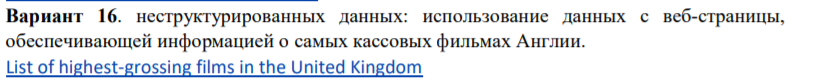

In [ ]:
from numpy import mean
from numpy import std

#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_the_United_Kingdom'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[3]
df

,Rank,Title,Gross(£ million),Year
0,01,Star Wars: The Force Awakens,123.2,2015
1,02,Skyfall,103.2,2012
2,03,No Time to Die,96.7[3][4],2021
3,04,Spectre,95.2,2015
4,05,Avengers: Endgame,88.7,2019
5,06,Star Wars: The Last Jedi,82.7,2017
6,07,The Lion King,76.0[6],2019
7,08,Harry Potter and the Deathly Hallows – Part 2,73.1[7],2011
8,09,Beauty and the Beast,72.4,2017
9,10,Avengers: Infinity War,70.8,2018


In [37]:
df['Rank']=df['Rank'].str.replace(r"*","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [38]:
df.head()

,Rank,Title,Gross(£ million),Year
0,01,Star Wars: The Force Awakens,123.2,2015
1,02,Skyfall,103.2,2012
2,03,No Time to Die,96.7[3][4],2021
3,04,Spectre,95.2,2015
4,05,Avengers: Endgame,88.7,2019


In [39]:
df['Gross(£ million)']=df['Gross(£ million)'].str.replace(r"\[[^\]]+\]","").str.replace(r".","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [40]:
df.head()

,Rank,Title,Gross(£ million),Year
0,01,Star Wars: The Force Awakens,1232,2015
1,02,Skyfall,1032,2012
2,03,No Time to Die,967,2021
3,04,Spectre,952,2015
4,05,Avengers: Endgame,887,2019


In [41]:
df.drop(['Rank'],axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             42 non-null     object
 1   Gross(£ million)  42 non-null     object
 2   Year              42 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [43]:
df

,Title,Gross(£ million),Year
0,Star Wars: The Force Awakens,1232,2015
1,Skyfall,1032,2012
2,No Time to Die,967,2021
3,Spectre,952,2015
4,Avengers: Endgame,887,2019
5,Star Wars: The Last Jedi,827,2017
6,The Lion King,760,2019
7,Harry Potter and the Deathly Hallows – Part 2,731,2011
8,Beauty and the Beast,724,2017
9,Avengers: Infinity War,708,2018


In [44]:
df.drop(labels = [41],axis = 0, inplace=True)

In [45]:
df.rename(columns={'Gross(£ million)':'Gross'}, inplace=True)

In [46]:
df['Gross']=df['Gross'].astype('int64')

In [47]:
df1=df[['Title','Gross']].sort_values(ascending=False,by='Gross')

In [48]:
df1

,Title,Gross
0,Star Wars: The Force Awakens,1232
1,Skyfall,1032
2,No Time to Die,967
3,Spectre,952
4,Avengers: Endgame,887
5,Star Wars: The Last Jedi,827
6,The Lion King,760
7,Harry Potter and the Deathly Hallows – Part 2,731
8,Beauty and the Beast,724
9,Avengers: Infinity War,708


In [49]:
data = df1['Gross']
print('mean=%.3f stdv=%.3f' %(mean(data), std(data)))

mean=605.220 stdv=189.360


# **Визуальные проверки нормальности**

**График гистограммы**

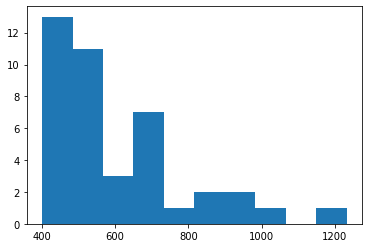

In [50]:
from matplotlib import pyplot

pyplot.hist(data)
pyplot.show()

*При выполнении примера создается график гистограммы, показывающий количество наблюдений в каждом бине. Мы можем видеть гауссовидную форму данных, которая, хотя и не сильно знакома в форме колокола, является грубым приближением.*

**Квантиль-Квантиль Участок**

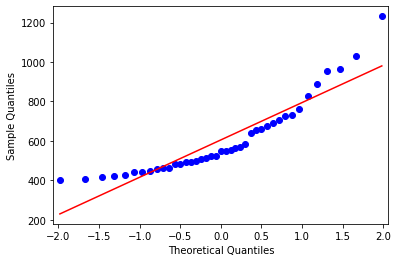

In [51]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data, line='s')
pyplot.show()

*При выполнении примера создается график QQ, показывающий график рассеяния точек в диагональной линии, который точно соответствует ожидаемому диагональному шаблону для выборки из распределения Гаусса. Есть несколько небольших отклонений, особенно в нижней части графика, что и следовало ожидать, учитывая небольшую выборку данных.*

# **Статистические тесты нормальности**

**Тест Шапиро-Вилка**

In [52]:
from scipy.stats import shapiro

stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample doesnt look Gaussian (regect H0)')

Statistics=0.854, p=0.000
Sample doesnt look Gaussian (regect H0)


*При выполнении примера сначала вычисляется тест для выборки данных, затем выводится статистика и вычисленное значение p. Значение p интересует и находит, что данные, скорее всего, взяты из гауссовского распределения.*

**Тест д'Агостино на K ^ 2**

In [53]:
from scipy.stats import normaltest

stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample doesnt look Gaussian (regect H0)')

Statistics=15.707, p=0.000
Sample doesnt look Gaussian (regect H0)


*При выполнении примера вычисляется статистика и печатается статистика и значение p. Значение p интерпретируется по отношению к альфа 5% и обнаруживает, что тестовый набор данных не отличается значительно от нормального.*

**Тест Андерсона-Дарлинга**

In [54]:
from scipy.stats import anderson

result = anderson(data)
print('Statistics=%.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[1], result.critical_values[1]
  if result.statistic < result.critical_values[1]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f, data doestn look normal (reject H0)' % (sl, cv))

Statistics=1.907
10.000: 0.606, data doestn look normal (reject H0)
10.000: 0.606, data doestn look normal (reject H0)
10.000: 0.606, data doestn look normal (reject H0)
10.000: 0.606, data doestn look normal (reject H0)
10.000: 0.606, data doestn look normal (reject H0)


*При выполнении примера вычисляется статистика по набору тестовых данных и выводятся критические значения. Критические значения в статистическом тесте - это диапазон предварительно определенных границ значимости, при которых H0 может быть отклонен, если расчетная статистика меньше критического значения. Вместо простого значения p тест возвращает критическое значение для диапазона различных обычно используемых уровней значимости. Существует возможность интерпретировать результаты, не сумев отвергнуть нулевую гипотезу о том, что данные являются нормальными, если рассчитанная статистика теста меньше критического значения на выбранном уровне значимости. На каждом уровне значимости тест обнаружил, что данные соответствуют нормальному распределению*

# **Итог**

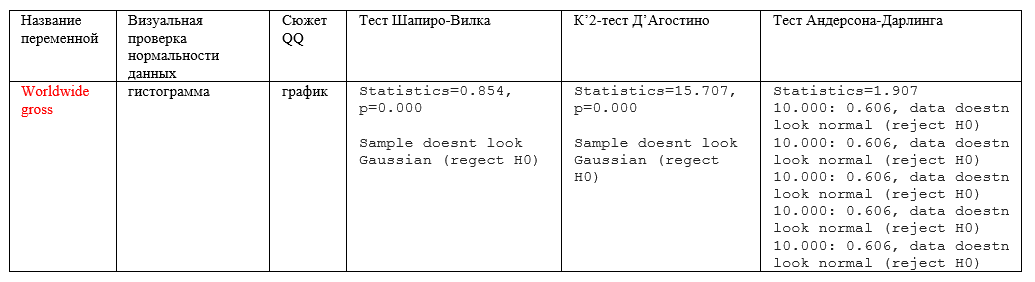